# Линейная регрессия в аналитическом виде. 

Случай двух переменных. Подробный пост ищите по #Магия_линейности в моём телеграм-блоге: https://t.me/jdata_blog


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model
from sklearn.metrics import r2_score

**Аналитическое описание задачи линейной регресии:** $X*w = y$. 

**Необходимо:** отыскать вектор весов w.

Задача может быть решена нахождением обратной матрицы. В случае, когда матрица $X$, содержая наблюдения, не квадратна, "квадратизация" происходит путём домножения на матрицу $X$ в транспонированном виде  $X^T$. 

**Тогда решение задачи выглядит так**

1. Постановка: $X*w = y$
2. Переход к квадратной матрице:  $X^TX*w = X^T*y$
3. Отыскание обратной матрицы: $(X^TX)^{-1}X^TX*w = (X^TX)^{-1}X^T*y$
4. Приход, по свойству обратной матрицы: к решению: $w = (X^TX)^{-1}X^T*y$


**Обратная матрица** — Матрицей $A^{-1}$ обратной к данной, называется такая $A^{-1}$, что $A^{-1}*A = E$, где Е — обозначение единичной матрицы. 

### Случай одной переменной

In [2]:
X = np.array([[2],
             [11],
             [17],
             [15],
             [20],
             [25]])
       
    
Y = np.array([[4], [22], [34], [30], [40], [50]])

In [3]:
#Отыскание транспонированной матрицы для перехода к шагу 2

X_t = X.transpose()

#Переход к квадратной матрице D
D = X_t.dot(X)

#Отыскание обратной матрицы перехода с шага 3 на шаг 4
D_inversed = np.linalg.inv(D)

#Получение вектора весов
w = D_inversed.dot(X_t).dot(Y)

#Генерация новых наблюдений
X_new = np.linspace(2, 25, 10)

#Получение "предсказания" их координаты по Y
predictions = (X_new*w).T

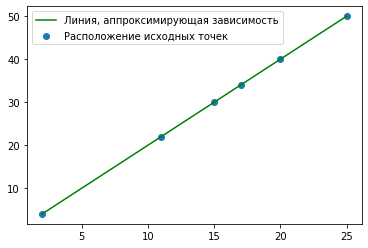

In [4]:
######################################## Визуализация наблюдений ####################################### 


#Полученная зависимость
plt.plot(X_new, predictions, label='Линия, аппроксимирующая зависимость', color='g')

#Визуализация "точек обучения"
plt.scatter(X, Y, label='Расположение исходных точек')

plt.legend()
plt.show()

### Случай двух переменных

In [5]:
X = np.array([[1, 40],
             [50, 3],
             [11, 17],
             [11.1, 17.3],
             [60.2, 40.1],
             [10, 1],
             [3, 19],
             [100, 1],
             [7, 30],
             [23, 27]])

Y = np.array([38.3, 117.7, 40.6, 41.1, 174.55, 23.9, 24, 230.9, 43.1, 77.2])

print('Размерность матрицы признаков:', X.shape)
print('Размерность вектора целевой переменной:', Y.shape)

Размерность матрицы признаков: (10, 2)
Размерность вектора целевой переменной: (10,)


Найдем коффициенты весов, разрешив уже знакомую систему линейных уравнений:

$𝑌=𝑋∗𝑤$ $\Rightarrow $ 
$w = (X^TX)^{-1}X^Ty$

In [6]:
weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

print('Найденные аналитически веса:', weights)
print('Размерность вектора весов:', weights.shape)

Найденные аналитически веса: [2.3 0.9]
Размерность вектора весов: (2,)


Сгенерируем данные для проверки "модели"

In [7]:
#Случайная последовательность диапазона первого признака
x1_feature = np.array([round(i/0.8) for i in np.random.sample(900)*100])

#Случайная последовательность диапазона второго признака
x2_feature = np.array([round(i/2) for i in np.random.sample(900)*100])

#Приведение новых точек к набору данных
new_points = np.column_stack([x1_feature, x2_feature])

print(new_points.shape)

(900, 2)


Получим предсказания для новых точек:  $Y_{new} = X_{new}*w$

In [8]:
#Получаем предсказания
predictions = new_points.dot(weights)

#Считаем истинную зависимость по загаданному уравнению 
#Да, я "загадала" в точности эти веса, сила математики!

true = 2.3*x1_feature + 0.9*x2_feature 

In [9]:
r2 = r2_score(true, predictions)
print('Качество вычисленных аналитически весов, r2_score:', r2)

Качество вычисленных аналитически весов, r2_score: 1.0


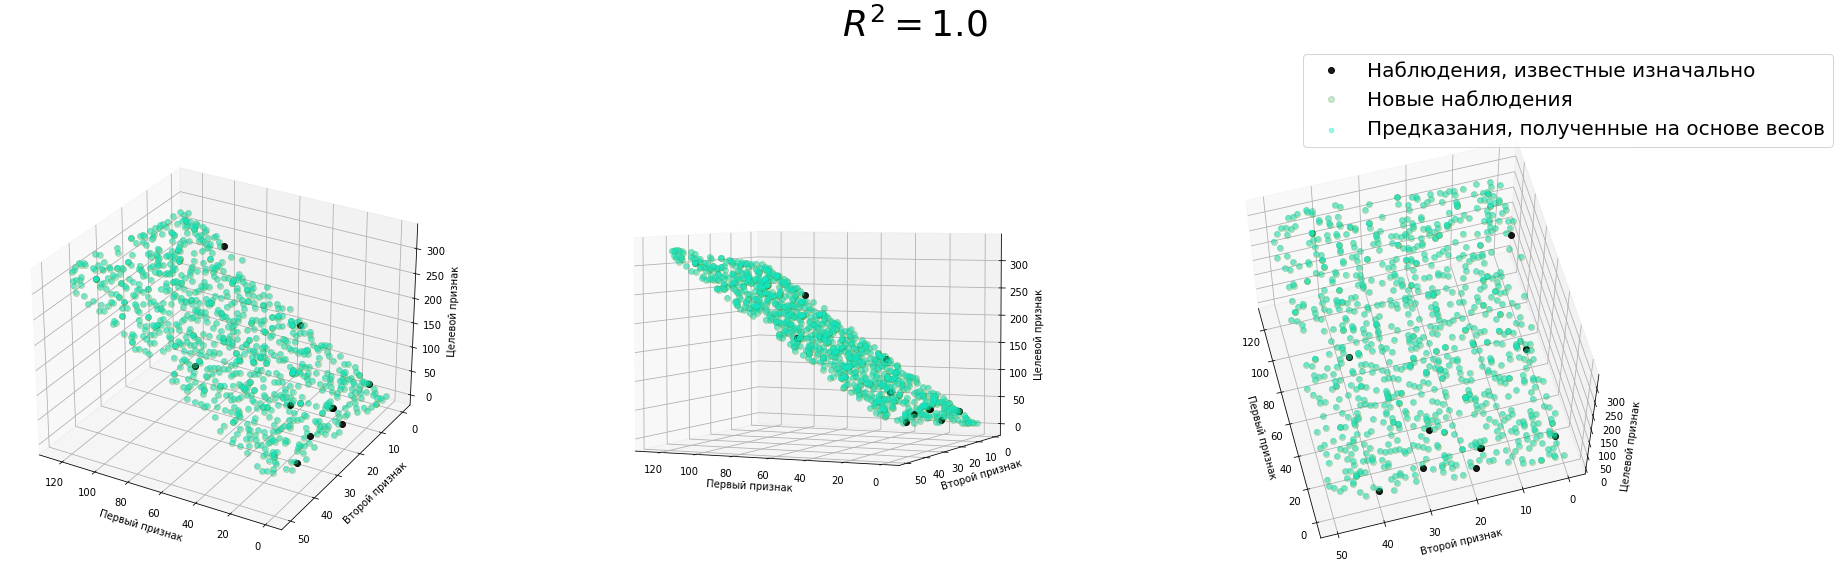

In [28]:
#Визуализация
#Нанесем на график точки, на которых обучались

x1 = X[:, 0] #координата X, координата по первому признаку
x2 = X[:, 1] #координата X2, координата по второму признаку
Y = Y #координата Y — целевая координата

#Нанесем на график новые точки

x1_new = x1_feature #координата X, координата по первому признаку
x2_new = x2_feature #координата X2, координата по второму признаку
y_true_new = true #координата Y — целевая координата


fig = plt.figure(figsize=(28, 8))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, Y, color='black', linestyle='none', marker='o', alpha=0.9, 
            label='Наблюдения, известные изначально')
    
    ax.plot(x1_new, x2_new, y_true_new, color='g', linestyle='none', marker='o', alpha=0.2,
           label='Новые наблюдения')
    
    ax.scatter(x1_feature, x2_feature, predictions, color='#13EAC9', marker='o', alpha=0.4, 
            label='Предказания, полученные на основе весов')
    ax.set_xlabel('Первый признак')
    ax.set_ylabel('Второй признак')
    ax.set_zlabel('Целевой признак')
      

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle(f'$R^2 = {round(r2, 2)}$', fontsize=36)

ax3.legend(bbox_to_anchor=(1, 0.7, 0.5, 0.5), fontsize=20)
fig.tight_layout()

fig.savefig('to_blog.png')

Такая магия. Такая математика.

Ваш дата-автор!)